## Task 4 : To Explore Decision Tree Algorithm

### Decision Tree Algorithm

In this task we have to create Decision Tree Classifier and visualize it graphically

## Importing Libraries

In [526]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

### Visualizing the Dataset - Table

In [527]:
df = pd.read_csv("Iris.csv")
df.drop("Id",axis = 1 , inplace = True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [528]:
df.shape

(150, 5)

### Describing Data 
Summary statistics, which include things like the mean, standard deviation,  quantile, min, and max of the data.

In [529]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking For Null Values

In [531]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Values under each Class

In [532]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Graphical Summaries

### Pair Plot

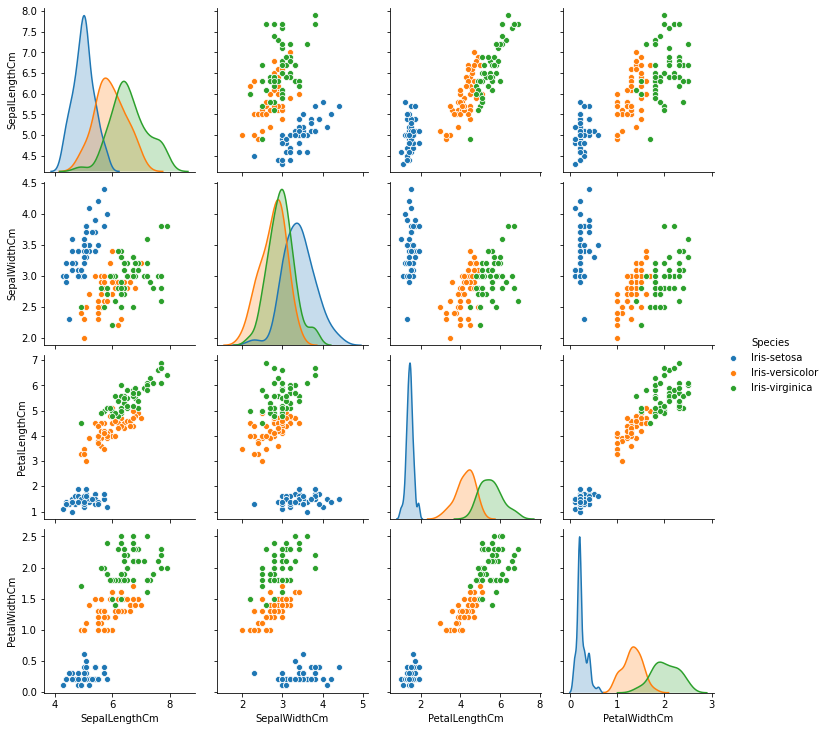

In [533]:
sns.pairplot(df,hue = "Species")

From the pair plot we can see that petal length and petal width are the most useful features to classify Iris Flower to there respective class.

### Box Plot

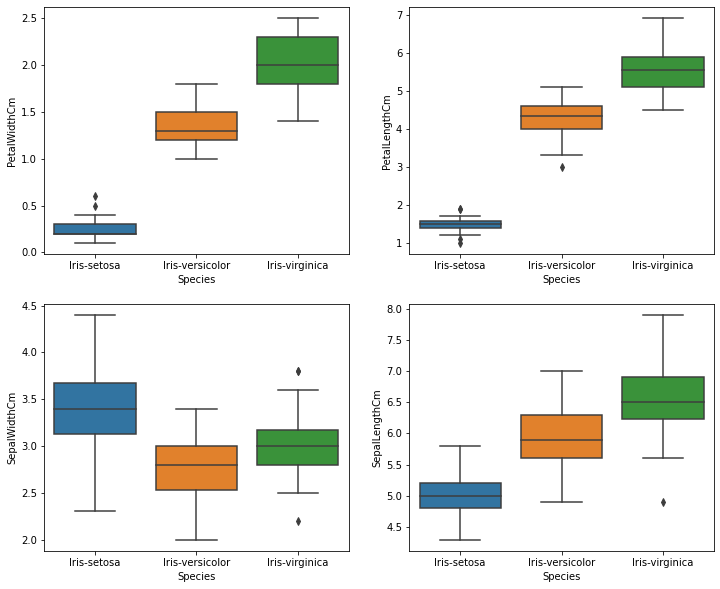

In [534]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.boxplot(x = "Species" , y = "PetalWidthCm",data = df)
plt.subplot(2,2,2)
sns.boxplot(x = "Species" , y = "PetalLengthCm",data = df)
plt.subplot(2,2,3)
sns.boxplot(x = "Species" , y = "SepalWidthCm",data = df)
plt.subplot(2,2,4)
sns.boxplot(x = "Species" , y = "SepalLengthCm",data = df)

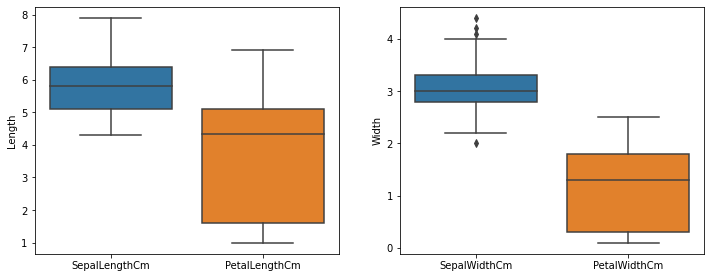

In [535]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
Iris = sns.boxplot(data=df.loc[:,["SepalLengthCm","PetalLengthCm"]])
_ = Iris.set_ylabel("Length")
plt.subplot(2,2,2)
Iris = sns.boxplot(data=df.loc[:,["SepalWidthCm","PetalWidthCm"]])
_ = Iris.set_ylabel("Width")

From Boxplots we can observe few outlier are present

### Outliers Removal

In [536]:
ab = df["SepalWidthCm"].quantile(0.99)

In [537]:
data = df[df["SepalWidthCm"]<ab]
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [538]:
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        48
Name: Species, dtype: int64

### Separation of Independent and Dependent Variables

In [549]:
x = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,-1]

In [550]:
x.shape , y.shape

((148, 4), (148,))

### Spliting Of Dataset into Training Set and Test Set

In [551]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [552]:
x_train.shape , x_test.shape

((103, 4), (45, 4))

In [553]:
y_train.shape , y_test.shape

((103,), (45,))

## Model Development

In [559]:
classifier = DecisionTreeClassifier()

### Grid Search

It is a process of performing hyper parameter tunning in order to determine the optimal values for a given model

In [560]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':range(2,20),"min_samples_leaf":range(1,10),
              "min_samples_split":range(2,10),"splitter":['best','random'],
              "max_leaf_nodes":[10,20,30,50]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 98.18 %
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'random'}


### Buliding a model using best parameters

In [565]:
classifier = DecisionTreeClassifier(criterion = "gini",max_depth=10 ,max_leaf_nodes = 10, min_samples_leaf = 4 , min_samples_split = 3, splitter = "random",random_state = 0)
classifier.fit(x_train, y_train)
print("Decesion Tree Creation Success")

Decesion Tree Creation Success


In [566]:
y_test_pred = classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)
print("Actual VS Predicted Classfication :")
result = pd.DataFrame({"Actual":y_test , "Predicted":y_test_pred})
result.head(10)

Actual VS Predicted Classfication :


,Actual,Predicted
25,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
39,Iris-setosa,Iris-setosa
116,Iris-virginica,Iris-virginica
28,Iris-setosa,Iris-setosa
27,Iris-setosa,Iris-setosa
45,Iris-setosa,Iris-setosa
56,Iris-versicolor,Iris-versicolor
134,Iris-virginica,Iris-virginica
73,Iris-versicolor,Iris-versicolor


### Accuracy for Train and Test data

In [567]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print("")
print("Acurracy for training dataset :{}".format(accuracy_score(y_train, y_train_pred)*100))
print("Acurracy for test dataset :{}".format(accuracy_score(y_test, y_test_pred)*100))

[[16  0  0]
 [ 0 15  0]
 [ 0  0 14]]

Acurracy for training dataset :96.11650485436894
Acurracy for test dataset :100.0


In [568]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Tree Visualization

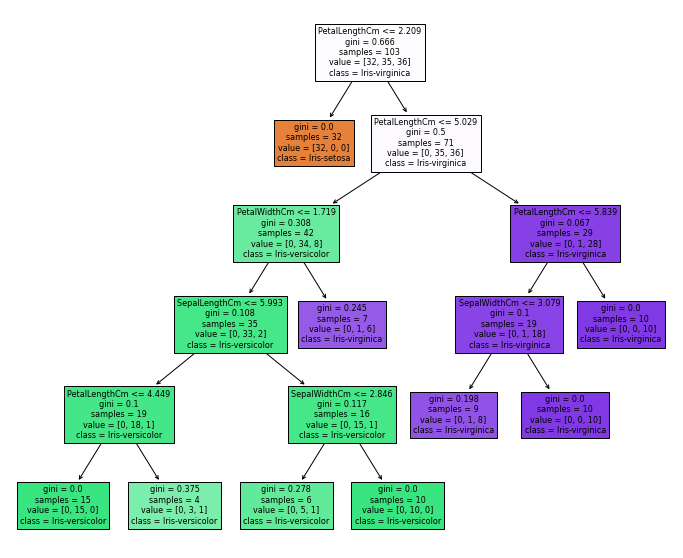

In [569]:
plt.figure(figsize = (12,10))
plot_tree(classifier , filled =True, feature_names =list(x.columns),class_names =df["Species"].unique())
plt.show()